<a href="https://colab.research.google.com/github/Rohit-Singh12/Deep-LEARGNINGS/blob/main/Misc/PytorchLightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Load Training and Test Data
trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)
testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 472kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.74MB/s]


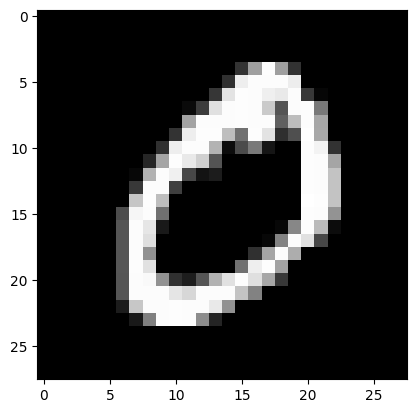

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(trainset.data[1], cmap='gray')

In [ ]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testLoader = DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
images, labels = next(iter(testLoader))

In [ ]:
trainset.classes, len(trainset.classes)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

In [ ]:
img_dim = trainset.data[0].shape

In [ ]:
img_dim

torch.Size([28, 28])

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(img_dim[0]*img_dim[1], 512)
    self.fc2 = nn.Linear(512, 1024)
    self.fc3 = nn.Linear(1024, 128)
    self.fc4 = nn.Linear(128, len(trainset.classes))
  def forward(self, input):
    x = input.view(-1, img_dim[0]*img_dim[1]) #flattening
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    return self.fc4(x)


In [ ]:
def Train(model):
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  loss_fun = nn.CrossEntropyLoss()
  n_epochs = 50
  for epoch in range(n_epochs):
    running_loss = 0.0
    for images, labels  in trainloader:
      optimizer.zero_grad()
      predictions = model(images)
      loss = loss_fun(predictions, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    print(f"Loss in epochs {epoch}: {running_loss}" )


In [ ]:
def evaluate(model):
  model.eval()
  correct,total = 0,0
  with torch.no_grad():
    for images, labels in testLoader:
      predictions = model(images)
      preds = torch.argmax(predictions, 1)
      total += len(preds)
      correct += (preds == labels).sum().item()
    return correct/total
  print(correct, total)

In [ ]:
model = Model()

In [ ]:
Train(model)

Loss in epochs 0: 288.1455240258947
Loss in epochs 1: 132.3326364699751
Loss in epochs 2: 99.66331222234294
Loss in epochs 3: 81.18690456915647
Loss in epochs 4: 67.68193159182556
Loss in epochs 5: 62.54274055082351
Loss in epochs 6: 54.948937128297985
Loss in epochs 7: 46.992985583958216
Loss in epochs 8: 42.81074091873597
Loss in epochs 9: 40.355680640393985
Loss in epochs 10: 34.260663296387065
Loss in epochs 11: 33.52983928071626
Loss in epochs 12: 34.66582011108403
Loss in epochs 13: 28.114359634513676
Loss in epochs 14: 26.54878718371765
Loss in epochs 15: 26.830271207798432
Loss in epochs 16: 25.222244618555123
Loss in epochs 17: 24.305917650377523
Loss in epochs 18: 25.54523316587074
Loss in epochs 19: 20.935824879172287
Loss in epochs 20: 20.557271168085208
Loss in epochs 21: 24.74616910491386
Loss in epochs 22: 17.49963815104138
Loss in epochs 23: 22.095746148546823
Loss in epochs 24: 18.709115605487796
Loss in epochs 25: 20.47791413546247
Loss in epochs 26: 17.89015879058456

In [ ]:
evaluate(model)

0.9773

# Using Pytorch Lightning

In [ ]:
!pip install pytorch-lightning torchmetrics

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchmetrics
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [ ]:
trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

In [ ]:
len(trainset)

60000

In [ ]:
train_ds, val_ds = torch.utils.data.random_split(trainset, [55000, 5000])
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
valloader = DataLoader(val_ds, batch_size=64)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
images,_ = next(iter(testloader))

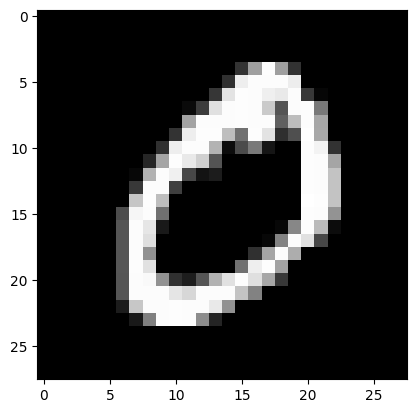

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(trainset.data[1], cmap='gray')
plt.show()

In [ ]:
img_dim = trainset.data[0].shape
img_dim

torch.Size([28, 28])

In [ ]:
class PLNetwork(pl.LightningModule):
  def __init__(self):
    super(PLNetwork, self).__init__()
    self.accuracy = torchmetrics.Accuracy(task='multiclass',
                                          num_classes=10)
    self.fc1 = nn.Linear(img_dim[0]*img_dim[1], 512)
    self.fc2 = nn.Linear(512, 1024)
    self.fc3 = nn.Linear(1024, 128)
    self.fc4 = nn.Linear(128, 10)

  def forward(self, input):
    X = input.view(-1, img_dim[0]*img_dim[1])
    X = torch.relu(self.fc1(X))
    X = torch.relu(self.fc2(X))
    X = torch.relu(self.fc3(X))
    return self.fc4(X)

  def training_step(self, batch, batch_idx):
    X, y = batch
    y_hat = self.forward(X)
    loss = F.cross_entropy(y_hat, y)
    self.log_dict({'train_loss':loss,
                   'accuracy': self.accuracy(y_hat, y)},
                  on_epoch=True,
                  on_step=False,
                  prog_bar=True)
    return loss

  def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log("val_loss", loss, prog_bar=True)
        return loss

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(),
                         lr=0.001)
  def test_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = F.cross_entropy(y_hat, y)
    self.log("val_loss", loss, prog_bar=True)
    return loss

  def predict_step(self, batch, batch_idx):
    X = batch
    prediction = self.forward(X)
    return torch.argmax(prediction, 1)

In [ ]:
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.profilers import SimpleProfiler
model = PLNetwork()
checkpoint_callback = ModelCheckpoint(monitor='val_loss',
                                      save_top_k=1,
                                      mode='min')

early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        mode='min')

trainer = pl.Trainer(
    max_epochs=5,
    accelerator='gpu',
    precision=16,
    callbacks=[checkpoint_callback, early_stopping_callback],
    profiler=SimpleProfiler()
)

/usr/local/lib/python3.11/dist-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, trainloader, valloader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | accuracy | MulticlassAccuracy | 0      | train
1 | fc1      | Linear             | 401 K  | train
2 | fc2      | Linear             | 525 K  | train
3 | fc3      | Linear             | 131 K  | train
4 | fc4      | Linear             | 1.3 K  | train
--------------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.239     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.profilers.profiler:FIT Profiler Report

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                               	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                        

In [ ]:
trainer.test(model, testloader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:476: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │     2.305236577987671     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.profilers.profiler:TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                       

[{'val_loss': 2.305236577987671}]